## Import Libraries and Dataset

First, let's take a look at the data, and see which questions could answer the three qustions:
* 1. There is a gender breach salary?
* 2. Remote Workers are more satisfied with their jobs than on site workers?
* 3. Which are the most common languages and how they are rewarded in terms of salary?

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy.  If we decided to build some basic plots, matplotlib might prove useful as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. There is a gender breach salary?

To answer the first question, let's look how are distributed the gender in the survey responses.

In [2]:
df['Gender'].value_counts().reset_index().head()


,index,Gender
0,Male,31589
1,Female,2600
2,Other,225
3,Male; Other,171
4,Gender non-conforming,160


We can observe that there is a huge difference of genders in the field. I Only took Male and Female Genders.

Now observe the formal education and employment status

In [3]:
df.query("Gender in ('Female','Male')").groupby(['Gender','EmploymentStatus'])[['EmploymentStatus']].count()

EmploymentStatus
Gender EmploymentStatus                                                    
Female Employed full-time                                              1998
       Employed part-time                                               167
       I prefer not to say                                               28
       Independent contractor, freelancer, or self-emp...               164
       Not employed, and not looking for work                            81
       Not employed, but looking for work                               154
       Retired                                                            8
Male   Employed full-time                                             22940
       Employed part-time                                              1817
       I prefer not to say                                              350
       Independent contractor, freelancer, or self-emp...              3508
       Not employed, and not looking for work                          1441
       Not employed, but looking for work                              1447
       Retired                                                           86

In [4]:
df.query("Gender in ('Female','Male')").groupby(['Gender','FormalEducation'])[['FormalEducation']].count()

FormalEducation
Gender FormalEducation                                                    
Female Bachelor's degree                                              1321
       Doctoral degree                                                  98
       I never completed any formal education                            2
       I prefer not to answer                                           19
       Master's degree                                                 690
       Primary/elementary school                                         4
       Professional degree                                              31
       Secondary school                                                143
       Some college/university study without earning a...              292
Male   Bachelor's degree                                             13402
       Doctoral degree                                                 826
       I never completed any formal education                          183
       I prefer not to answer                                          413
       Master's degree                                                7015
       Primary/elementary school                                       550
       Professional degree                                             389
       Secondary school                                               3484
       Some college/university study without earning a...             5327

According to responses, I only took people who are employed or selfemployed. And all the Formal education will be taking into account

In [5]:
df1 = df.query("Gender in ('Female','Male') and EmploymentStatus in ('Employed part-time','Employed full-time','Independent contractor, freelancer, or self-employed') ")
df1.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN


To answer this question, Missing Data will be handled just taking into account the Salary value must be filled.

In [6]:
df1.shape[0]

30594

In [7]:
df1['Salary'].dropna().shape[0]

11485

In [8]:
df2 = df1.query("Gender in ('Female','Male') and Salary >0").groupby(['Gender'])[['Gender']].count()
df2

,Gender
Gender,
Female,818
Male,10664


There was almost 20k responses without salary. Now let's compare Average salary according to Gender and Formal Education

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, "Some college/university study without earning a bachelor's degree"),
  Text(1, 0, "Bachelor's degree"),
  Text(2, 0, 'Doctoral degree'),
  Text(3, 0, "Master's degree"),
  Text(4, 0, 'Professional degree'),
  Text(5, 0, 'Primary/elementary school'),
  Text(6, 0, 'Secondary school'),
  Text(7, 0, 'I prefer not to answer'),
  Text(8, 0, 'I never completed any formal education')])

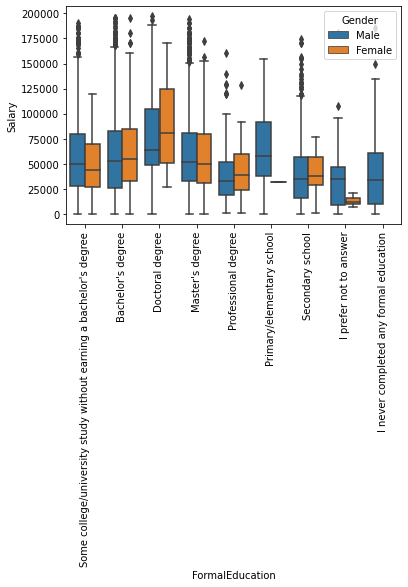

In [9]:
sns.boxplot(x = df1['FormalEducation'], y = df1['Salary'], hue = df1['Gender'])
plt.xticks(rotation=90)

## 2. Remote Workers are more satisfied with their jobs than on site workers?

First, let's define on site workers as people who doesn't work any day at their home. So with this definition, we create a dummy variable to agrupate all the posible varibles of home remote work.

In [10]:
df['HomeRemote'].value_counts().reset_index().head()

,index,HomeRemote
0,A few days each month,15454
1,Never,13975
2,All or almost all the time (I'm full-time remote),4905
3,"Less than half the time, but at least one day ...",4147
4,"More than half, but not all, the time",1909


In [11]:
df['Dummy_HomeRemote'] = np.where(df['HomeRemote'] == 'Never', 0, 1)
df['Dummy_HomeRemote'].head()

0    1
1    1
2    1
3    1
4    0
Name: Dummy_HomeRemote, dtype: int32

Now, let's extract the information that could give us information to answer the second question. First, we look at job satisfaction. 

In [12]:
df[['JobSatisfaction']].value_counts()

JobSatisfaction
8.0                8983
7.0                7969
9.0                5573
6.0                4726
10.0               4148
5.0                3749
4.0                1865
3.0                1635
2.0                 888
0.0                 467
1.0                 373
dtype: int64

In [13]:
df21 = df.query("JobSatisfaction >0 and EmploymentStatus in ('Employed part-time','Employed full-time','Independent contractor, freelancer, or self-employed')")

<AxesSubplot:xlabel='Dummy_HomeRemote', ylabel='JobSatisfaction'>

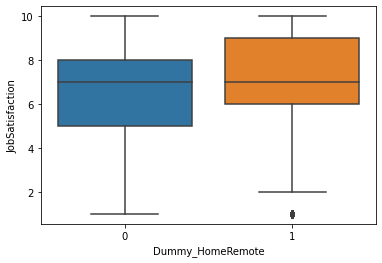

In [14]:
sns.boxplot(x = df21['Dummy_HomeRemote'], y = df21['JobSatisfaction'])

And we're going to complete the analysis with satisfaction in Hardware as Monitor, CPU, RAM, Storage and Reading/Writing speed. First look at the posible answers and transform to numeric values

In [15]:
df[[
'EquipmentSatisfiedRW',
]].value_counts()

EquipmentSatisfiedRW
Satisfied               12040
Very satisfied           8197
Somewhat satisfied       5464
Not very satisfied       2832
Not at all satisfied     1156
dtype: int64

Now, generate 5 new colums with this numeric values.

In [16]:
satisfaction = ['EquipmentSatisfiedMonitors',
                'EquipmentSatisfiedCPU',
                'EquipmentSatisfiedRAM',
                'EquipmentSatisfiedStorage',
                'EquipmentSatisfiedRW']
for i in satisfaction:
    df['num_'+ i ] = np.where(df[i] == 'Very satisfied',4,
                        np.where(df[i] == 'Satisfied',3,
                        np.where(df[i] == 'Somewhat satisfied',2,
                        np.where(df[i] == 'Not very satisfied',1,np.NaN))))
    

Finally, generate counts on each row on how many Nan's there is to not take into acount into average hardware satisfaction.

In [17]:
df['Satisfaction_Nan'] = np.where(df['EquipmentSatisfiedMonitors'].isnull(),1,0) + \
                        np.where(df['EquipmentSatisfiedCPU'].isnull(),1,0) + \
                        np.where(df['EquipmentSatisfiedRAM'].isnull(),1,0) + \
                        np.where(df['EquipmentSatisfiedStorage'].isnull(),1,0) + \
                        np.where(df['EquipmentSatisfiedRW'].isnull(),1,0)

In [18]:
df['Satisfaction_Nan'].value_counts()

0    29342
5    21551
1      428
4       38
2       22
3       11
Name: Satisfaction_Nan, dtype: int64

Again, we take into account the EmploymentStatus which are employed.

In [19]:
df22 = df.query("Satisfaction_Nan < 5 and EmploymentStatus in ('Employed part-time','Employed full-time','Independent contractor, freelancer, or self-employed')")

In [20]:
df22['avg_hardware_satisfaction'] = (df['num_EquipmentSatisfiedMonitors'] + \
                                    df['num_EquipmentSatisfiedCPU']+ \
                                    df['num_EquipmentSatisfiedRAM']+ \
                                    df['num_EquipmentSatisfiedStorage']+ \
                                    df['num_EquipmentSatisfiedRW']) / (5 - df['Satisfaction_Nan'])

C:\Users\JDCUESAB\AppData\Local\Temp\ipykernel_20012\3674688815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['avg_hardware_satisfaction'] = (df['num_EquipmentSatisfiedMonitors'] + \


<AxesSubplot:xlabel='Dummy_HomeRemote', ylabel='avg_hardware_satisfaction'>

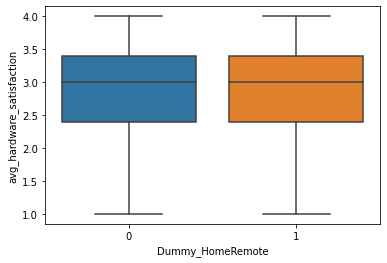

In [21]:
sns.boxplot(x = df22['Dummy_HomeRemote'], y = df22['avg_hardware_satisfaction'])

In [22]:
df22.groupby(['Dummy_HomeRemote'])['avg_hardware_satisfaction'].mean()

Dummy_HomeRemote
0    2.902958
1    2.928930
Name: avg_hardware_satisfaction, dtype: float64

There is a slight difference in hardware satisfaction. Nevertheless, there is not a significat difference between remote work and on site work.

 ## 3. Which are the most common languages and how they are rewarded in terms of salary?

First of all, get all the answers on HaveWorkedLanguage and get the impact on the salary

In [23]:
df3 = df[['HaveWorkedLanguage','Salary']].dropna()
df3

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.000000
14,Assembly; C; C++,100000.000000
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.000000
22,Java,100764.000000
25,Java; Scala,175000.000000
...,...,...
51371,Go; JavaScript; Python,74193.548387
51378,JavaScript; Objective-C; Python; Swift,107526.881720
51382,C#; JavaScript; TypeScript,32258.064516
51387,C#; JavaScript; Python; SQL; VB.NET; VBA,58000.000000


Now, let's extract all posible languages in this answers 

In [24]:
df31 = df3['HaveWorkedLanguage'].str.get_dummies(sep='; ')
df31.head()

,Assembly,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,Erlang,...,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The most common languages are Javascript, SQL, C#, Java and Python

In [25]:
df31.sum().sort_values(ascending = False).head(10)

JavaScript    8132
SQL           6512
C#            4597
Java          4572
Python        3442
PHP           3082
C++           2166
C             1684
TypeScript    1381
Ruby          1249
dtype: int64

In [26]:
df31.sum().sort_values(ascending = True).head(10)

Julia           26
Hack            32
Dart            52
Common Lisp     60
Smalltalk       79
Erlang          87
Rust           123
Clojure        136
Elixir         140
Haskell        141
dtype: int64

Now, train a supervised model and get the most important languages in terms of coefficient of modification of salary

In [27]:
def ml_linear_model(X, y, rand_st, tst_size):
    
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    rand_st - int, default 42, controls random state for train_test_split
    tst_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    
    OUTPUT
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    coefs_df - coefficients of lm_model 
    '''
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_size, random_state=rand_st)

    lm_model = LinearRegression() 
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    
    coefs_df = pd.DataFrame()

    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    
    return coefs_df

In [28]:
coeficients = ml_linear_model(df31, df3['Salary'], 42, 0.3)

We can observe that Perl, Hack, Clojure, Go and Smalltalk are the most important languages in terms of salary. So learning one of this languages will benefit in terms of salary.

In [29]:
coeficients.sort_values('coefs', ascending=False).head(10)

,est_int,coefs,abs_coefs
22,Perl,14605.479324,14605.479324
13,Hack,11742.449055,11742.449055
4,Clojure,10818.906788,10818.906788
11,Go,9956.239078,9956.239078
29,Smalltalk,8132.314769,8132.314769
12,Groovy,8101.548993,8101.548993
28,Scala,7605.302637,7605.302637
25,Ruby,6747.766798,6747.766798
10,F#,5650.060498,5650.060498
23,Python,5395.902138,5395.902138


On the other hand PHP, Dart, Java, Haskell and VB.NET are not recommended to learn in terms of salary.

In [30]:
coeficients.sort_values('coefs', ascending=True).head(10)

,est_int,coefs,abs_coefs
21,PHP,-17652.396639,17652.396639
7,Dart,-13421.507867,13421.507867
15,Java,-5750.510952,5750.510952
14,Haskell,-5657.833093,5657.833093
32,VB.NET,-5160.740749,5160.740749
0,Assembly,-4248.316075,4248.316075
34,Visual Basic 6,-4013.613644,4013.613644
1,C,-2060.428543,2060.428543
18,Lua,-1458.916457,1458.916457
19,Matlab,-510.575346,510.575346
